In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
chemin='drive/MyDrive/Colab Notebooks/PJI/Premier League/'
data_1=pd.read_csv(chemin+'PL2018-2019.csv')
data_2=pd.read_csv(chemin+'PL2017-2018.csv')
data_3=pd.read_csv(chemin+'PL2016-2017.csv')
data_4=pd.read_csv(chemin+'PL2015-2016.csv')
data_5=pd.read_csv(chemin+'PL2014-2015.csv')
data_6=pd.read_csv(chemin+'PL2013-2014.csv')
data_7=pd.read_csv(chemin+'PL2012-2013.csv')
data_8=pd.read_csv(chemin+'PL2011-2012.csv')

In [ ]:
# Team goal means
def preprocess(dataset):


  col=['FTR','par1','par2','par3','par4']

  dataset['par1'] = dataset['FTHG'].groupby(dataset['HomeTeam']).transform('mean')
  dataset['par2'] = dataset['FTHG'].groupby(dataset['AwayTeam']).transform('mean')
  dataset['par3'] = dataset['FTAG'].groupby(dataset['HomeTeam']).transform('mean')
  dataset['par4'] = dataset['FTAG'].groupby(dataset['AwayTeam']).transform('mean')

  dataset=dataset[col]
  dataset=dataset.dropna(axis=0)

  lb=LabelEncoder()
  #dataset['FTR']=lb.fit_transform(dataset['FTR'])
  dataset['FTR']=dataset['FTR'].apply(lambda x: 0 if x=='H' else 1)
  
  return dataset


dataset=preprocess(data_1)
dataset

FTR      par1      par2      par3      par4
0      0  1.736842  1.473684  1.315789  1.421053
1      0  1.578947  1.631579  1.315789  0.684211
2      1  1.157895  1.578947  1.894737  1.684211
3      1  0.526316  1.421053  1.631579  1.263158
4      1  1.263158  1.210526  1.315789  1.736842
..   ...       ...       ...       ...       ...
375    0  2.894737  1.315789  0.526316  1.000000
376    1  1.736842  1.631579  1.315789  0.684211
377    1  1.421053  2.368421  1.578947  0.631579
378    1  1.789474  1.315789  0.842105  1.263158
379    1  1.368421  1.473684  1.473684  1.052632

[380 rows x 5 columns]

In [ ]:
res=[]
res.append(preprocess(data_1))
res.append(preprocess(data_2))
res.append(preprocess(data_3))
res.append(preprocess(data_4))
res.append(preprocess(data_5))
res.append(preprocess(data_6))
res.append(preprocess(data_7))
res.append(preprocess(data_8))

In [ ]:
dataset=pd.concat(res,axis=0)
dataset.reset_index(inplace=True)

In [ ]:
dataset

index  FTR      par1      par2      par3      par4
0         0    0  1.736842  1.473684  1.315789  1.421053
1         1    0  1.578947  1.631579  1.315789  0.684211
2         2    1  1.157895  1.578947  1.894737  1.684211
3         3    1  0.526316  1.421053  1.631579  1.263158
4         4    1  1.263158  1.210526  1.315789  1.736842
...     ...  ...       ...       ...       ...       ...
3035    375    1  1.368421  0.736842  0.894737  1.947368
3036    376    0  1.421053  1.263158  0.947368  1.210526
3037    377    0  2.052632  1.315789  0.894737  0.631579
3038    378    1  1.105263  1.684211  1.157895  1.842105
3039    379    0  1.157895  2.052632  1.421053  1.105263

[3040 rows x 6 columns]

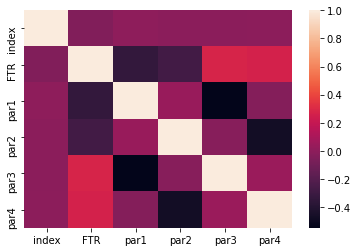

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(dataset.corr(method="pearson"), ax=ax)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, dataset['FTR'], 
    test_size=0.33,shuffle=True,random_state=42)

In [ ]:
## Model XBClassifier


model = XGBClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.predict_proba(X_test)

array([[9.9905485e-01, 9.4516063e-04],
       [8.2606077e-04, 9.9917394e-01],
       [9.9877226e-01, 1.2277530e-03],
       ...,
       [8.2606077e-04, 9.9917394e-01],
       [9.9877226e-01, 1.2277530e-03],
       [7.9184771e-04, 9.9920815e-01]], dtype=float32)

In [ ]:
data_1.groupby(data_1['HomeTeam']).transform('mean')

FTHG      FTAG      HTHG  ...      par2      par3      par4
0    1.736842  1.315789  0.842105  ...  1.570637  1.315789  1.229917
1    1.578947  1.315789  0.789474  ...  1.526316  1.315789  1.246537
2    1.157895  1.894737  0.473684  ...  1.526316  1.894737  1.285319
3    0.526316  1.631579  0.210526  ...  1.526316  1.631579  1.285319
4    1.263158  1.315789  0.526316  ...  1.587258  1.315789  1.268698
..        ...       ...       ...  ...       ...       ...       ...
375  2.894737  0.526316  1.368421  ...  1.617729  0.526316  1.224377
376  1.736842  1.315789  0.842105  ...  1.570637  1.315789  1.229917
377  1.421053  1.578947  0.736842  ...  1.554017  1.578947  1.268698
378  1.789474  0.842105  0.684211  ...  1.587258  0.842105  1.227147
379  1.368421  1.473684  0.368421  ...  1.565097  1.473684  1.246537

[380 rows x 59 columns]